# **I. Import Data and Necessary Libraries**




In [ ]:
# IMPORT EVERYTHING
from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_recall_curve
from sklearn.base import clone
import pickle
import joblib
import os
import seaborn as sns
import math

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/BOOC_Dataset/emp-dataset.csv')

df.head()

Mounted at /content/drive


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


# **II. Exploratory Data Analysis (EDA)**

In [ ]:
# SEE DATA TYPES AND CHECK MISSING VALUES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [ ]:
# SEE FEATURE OVERVIEW

df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


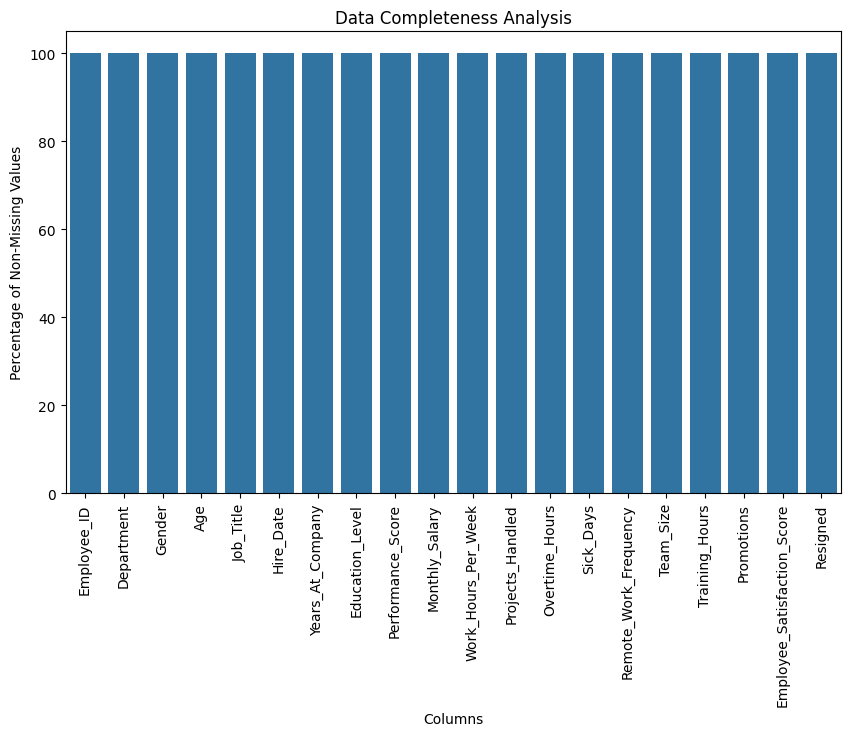

In [ ]:
# CHECKING FOR COMPLETENESS
completeness_percentages = (df.notnull().sum() * 100) / len(df)

# Visualizing completeness
plt.figure(figsize=(10, 6))
sns.barplot(x=completeness_percentages.index, y=completeness_percentages.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Non-Missing Values')
plt.title('Data Completeness Analysis')
plt.show()

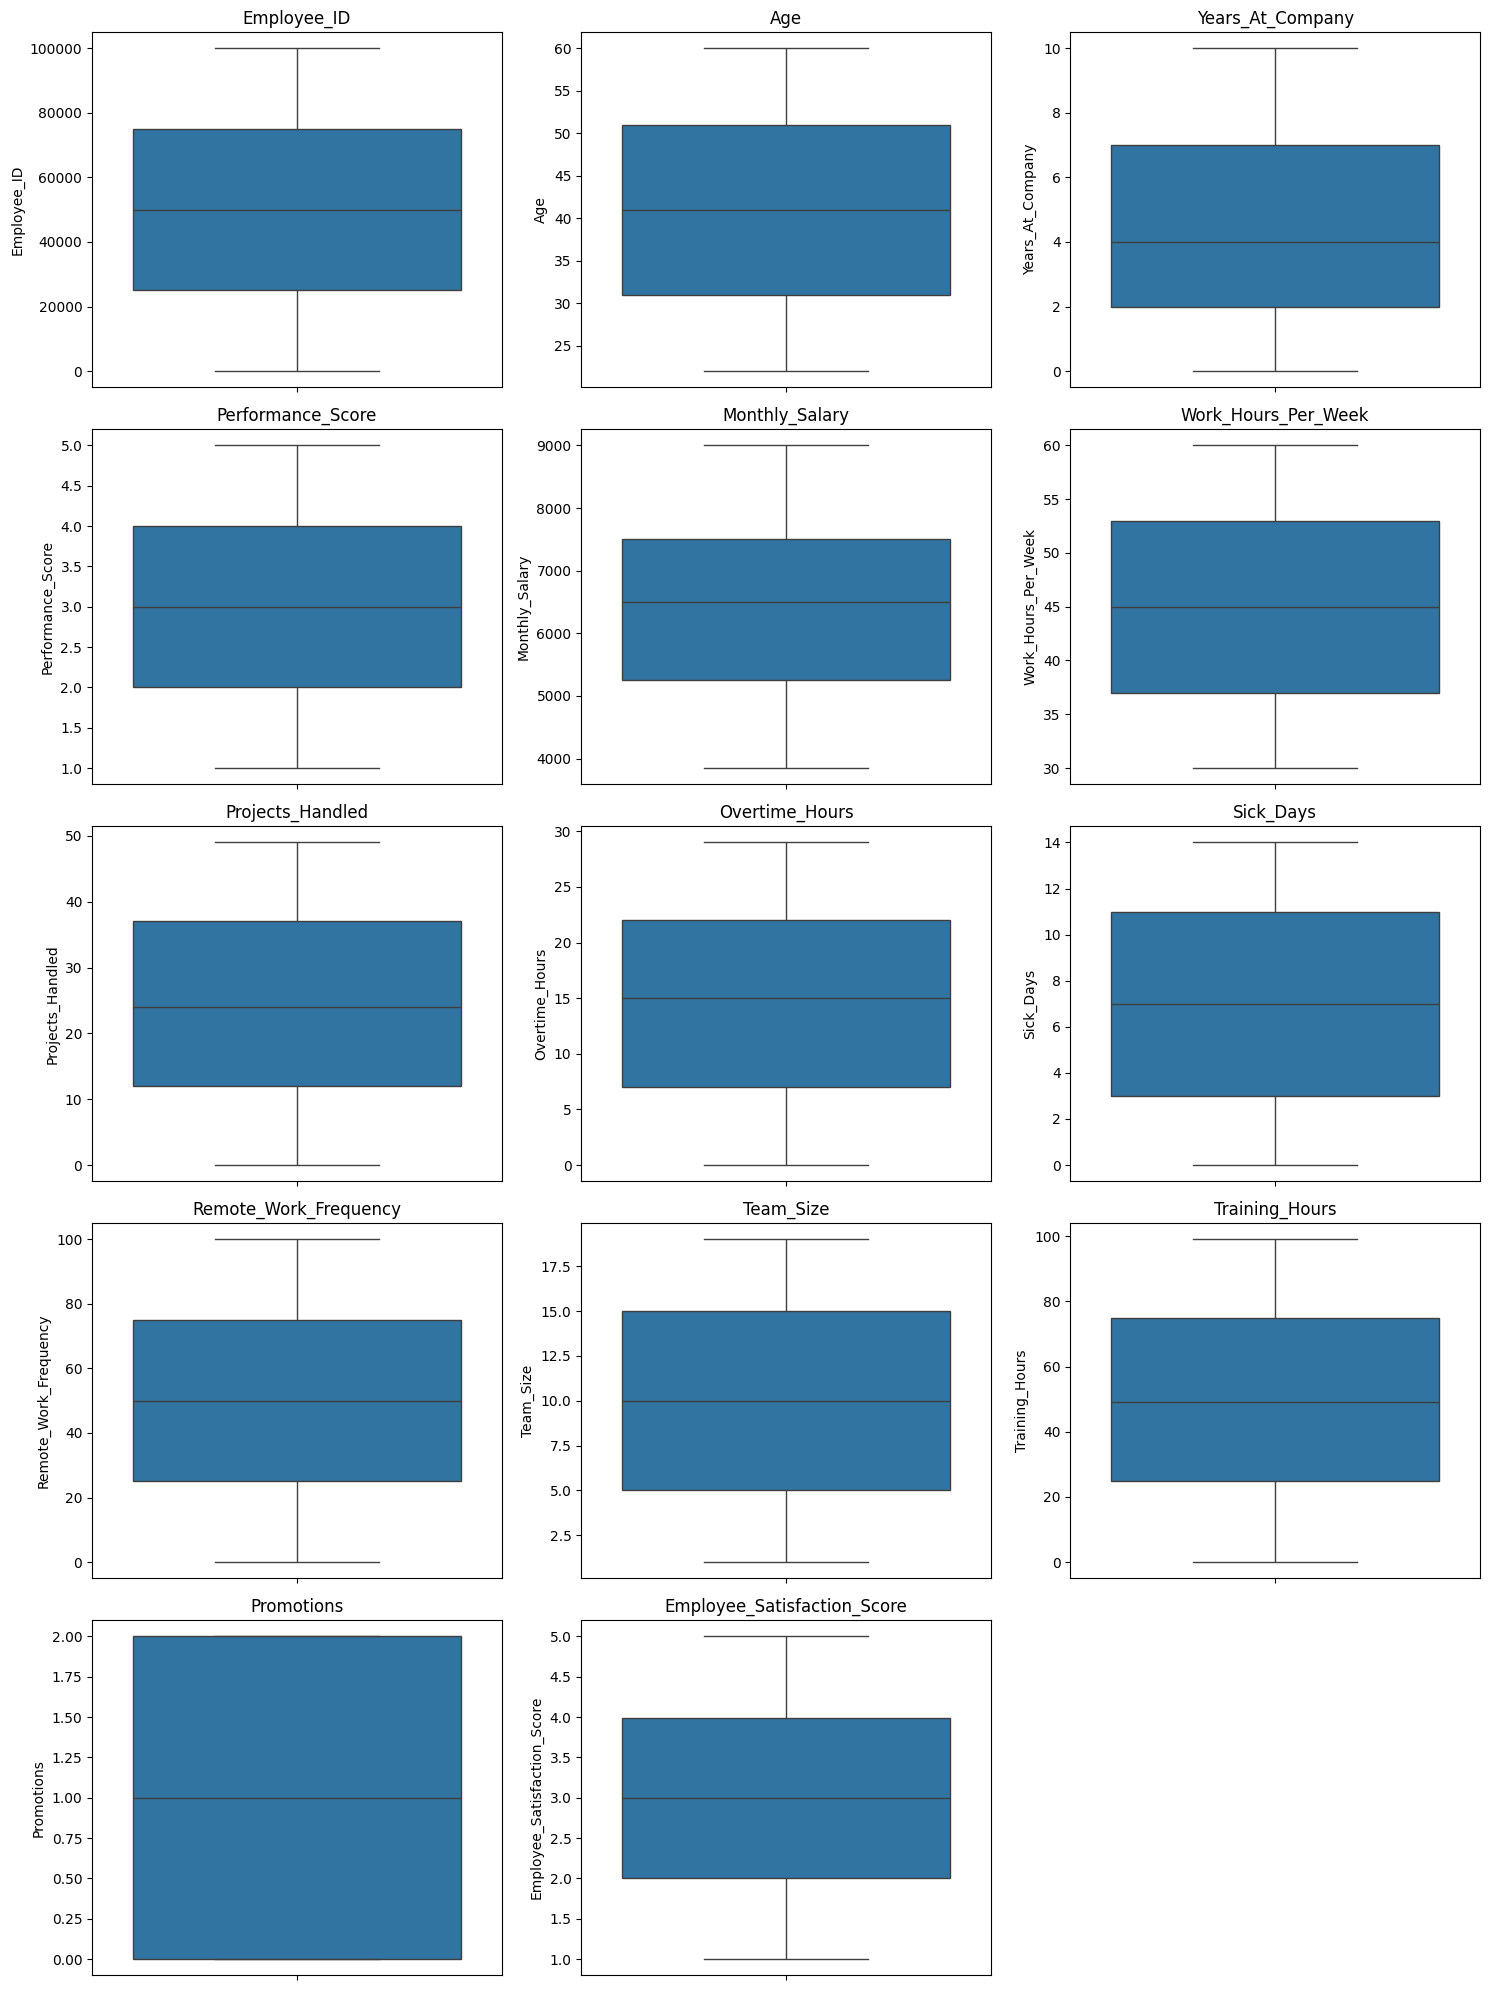

In [ ]:
# CHECKING FOR OUTLIERS
numerical_cols = df.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


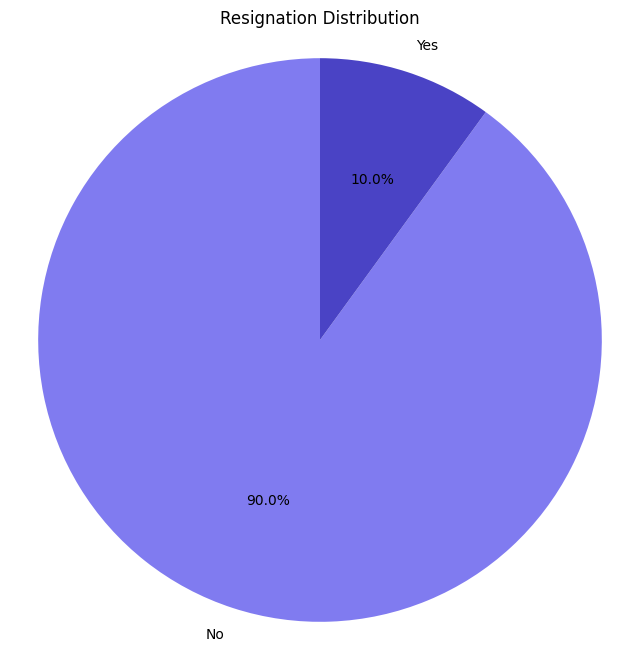

In [ ]:
# SEE TARGET VARIABLE DISTRIBUTION

resigned_counts = df['Resigned'].value_counts()
labels = ['No', 'Yes']
colors = ['#807bf0', '#4a43c5']

plt.figure(figsize=(8, 8))
plt.pie(resigned_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Resignation Distribution')
plt.axis('equal')
plt.show()


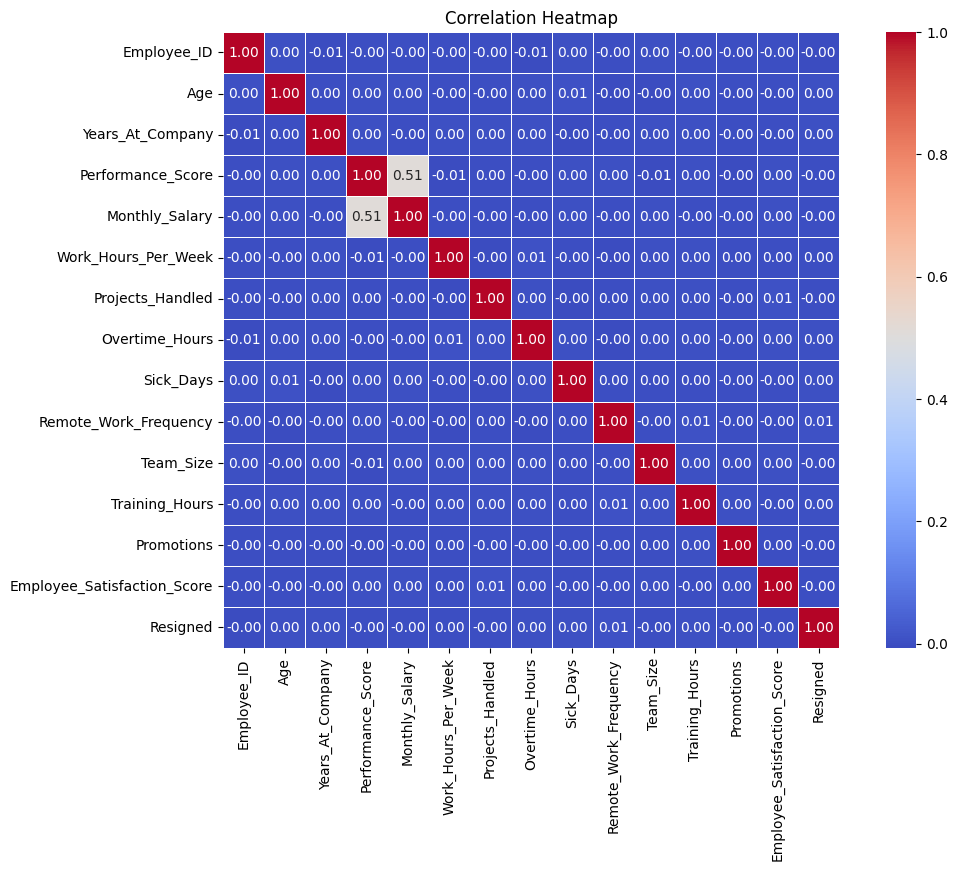

In [ ]:
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

# **III. Data Cleaning and Preprocessing**

In [ ]:
# GENERATING FEATURES

# Feature: Tenure (Years since Hire_Date)
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')
current_date = datetime.now()
df['Tenure'] = (current_date - df['Hire_Date']).dt.days // 365

# Feature: Salary Per Project (to evaluate salary against productivity)
df['Salary_Per_Project'] = df['Monthly_Salary'] / df['Projects_Handled'].replace(0, np.nan)

# Feature: Overtime Ratio (Overtime hours as a percentage of total worked hours)
df['Total_Work_Hours'] = (df['Work_Hours_Per_Week'] * 52) + df['Overtime_Hours']
df['Overtime_Ratio'] = df['Overtime_Hours'] / df['Total_Work_Hours'].replace(0, np.nan)

In [ ]:
# ONE-HOT ENCODING CATEGORICAL COLUMNS

cols_to_one_hot = ['Gender', 'Department', 'Job_Title', 'Education_Level']
existing_cols = [col for col in cols_to_one_hot if col in df.columns]

if existing_cols:
    df = pd.get_dummies(df, columns=existing_cols, drop_first=True)
    print("One-hot encoding performed on:", existing_cols)
else:
    print("One-hot encoding skipped — columns already encoded or missing.")

df.info()

One-hot encoding performed on: ['Gender', 'Department', 'Job_Title', 'Education_Level']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  int64         
 1   Age                          100000 non-null  int64         
 2   Hire_Date                    100000 non-null  datetime64[ns]
 3   Years_At_Company             100000 non-null  int64         
 4   Performance_Score            100000 non-null  int64         
 5   Monthly_Salary               100000 non-null  float64       
 6   Work_Hours_Per_Week          100000 non-null  int64         
 7   Projects_Handled             100000 non-null  int64         
 8   Overtime_Hours               100000 non-null  int64         
 9   Sick_Days                    100000 non-null  int64         
 10  Remot

In [ ]:
# DROPPING COLUMNS

cols_to_drop = ['Employee_ID', 'Years_At_Company', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Hire_Date']
df_clean = df.drop(columns=cols_to_drop, errors='ignore')

# Drop rows with NaN in Salary_Per_Project
df_clean = df_clean.dropna(subset=['Salary_Per_Project'])

# Define features and target
target = 'Resigned'
features = [col for col in df_clean.columns if col != target]

# Drop rows with NaN in feature columns
df_clean = df_clean.dropna(subset=features)

# Save the feature columns (list of column names) into a .pkl file
joblib.dump(features, 'emp_feature_columns.pkl')
print("Saved feature columns:", features)

joblib.dump(features, '/content/drive/My Drive/BOOC_Dataset/emp_feature_columns.pkl')

Saved feature columns: ['Age', 'Performance_Score', 'Monthly_Salary', 'Projects_Handled', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score', 'Tenure', 'Salary_Per_Project', 'Total_Work_Hours', 'Overtime_Ratio', 'Gender_Male', 'Gender_Other', 'Department_Engineering', 'Department_Finance', 'Department_HR', 'Department_IT', 'Department_Legal', 'Department_Marketing', 'Department_Operations', 'Department_Sales', 'Job_Title_Consultant', 'Job_Title_Developer', 'Job_Title_Engineer', 'Job_Title_Manager', 'Job_Title_Specialist', 'Job_Title_Technician', 'Education_Level_High School', 'Education_Level_Master', 'Education_Level_PhD']


['/content/drive/My Drive/BOOC_Dataset/emp_feature_columns.pkl']

Model Accuracy: 90.06%



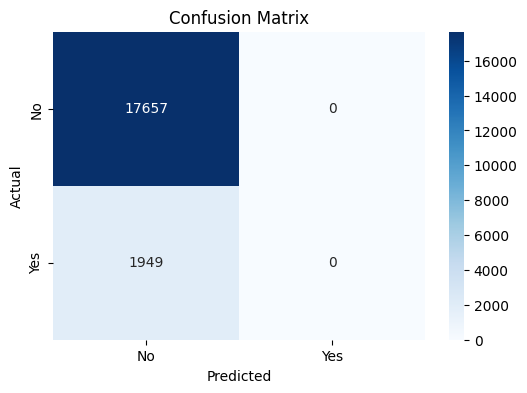

Classification Report:

              precision    recall  f1-score   support

          No       0.90      1.00      0.95     17657
         Yes       0.00      0.00      0.00      1949

    accuracy                           0.90     19606
   macro avg       0.45      0.50      0.47     19606
weighted avg       0.81      0.90      0.85     19606



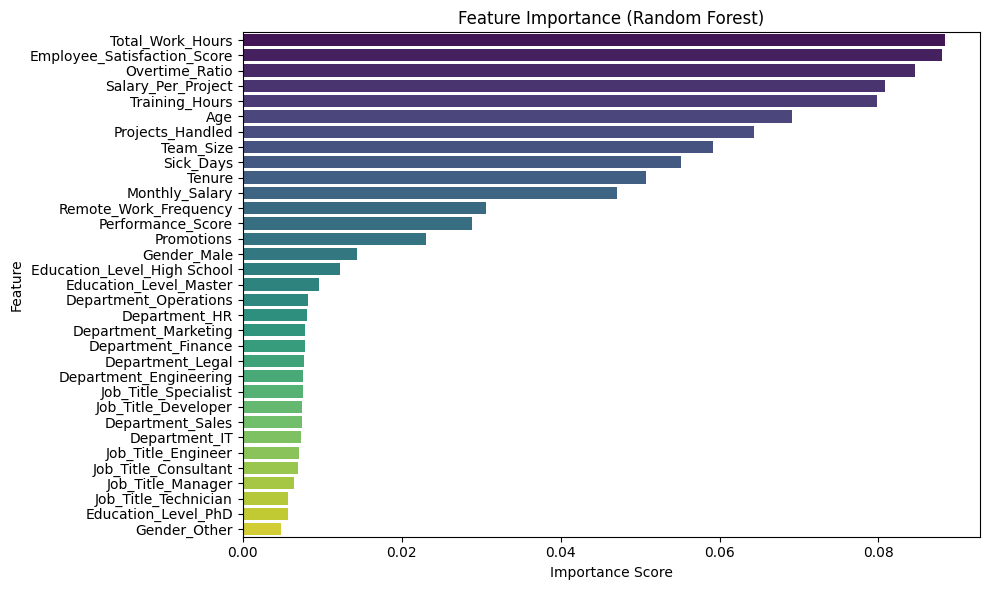

In [ ]:
# SPLITTING INTO TRAIN-TEST, SEEING FEATURE IMPORTANCE, USING RF

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No', 'Yes'], zero_division=0)

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

# Display results
print(f"Model Accuracy: {accuracy:.2%}\n")

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes'], zero_division=0))

# Display feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index,
    hue=feature_importance.index,
    palette='viridis',
    legend=False
)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **IV. Model Comparison**


 Evaluating: Random Forest
5-Fold F1 Score: 0.8378 (+/- 0.0030)

Best Threshold for Random Forest: 0.40
Accuracy: 0.6740
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.71      0.80     17657
        True       0.11      0.31      0.16      1949

    accuracy                           0.67     19606
   macro avg       0.51      0.51      0.48     19606
weighted avg       0.82      0.67      0.73     19606



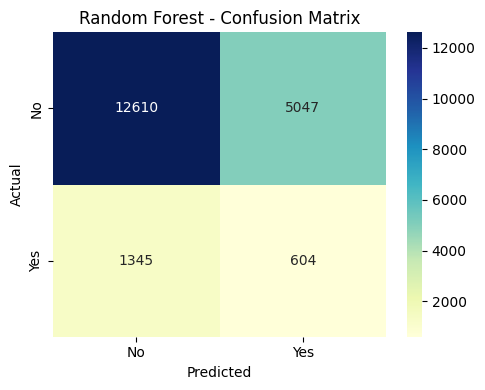

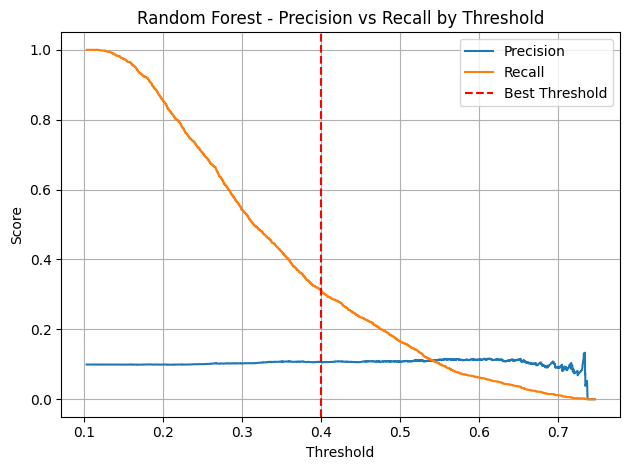


 Evaluating: Logistic Regression
5-Fold F1 Score: 0.8263 (+/- 0.0029)

Best Threshold for Logistic Regression: 0.40
Accuracy: 0.7805
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.85      0.87     17657
        True       0.10      0.14      0.11      1949

    accuracy                           0.78     19606
   macro avg       0.50      0.50      0.49     19606
weighted avg       0.82      0.78      0.80     19606



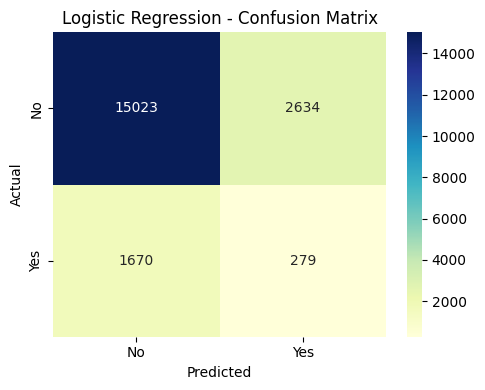

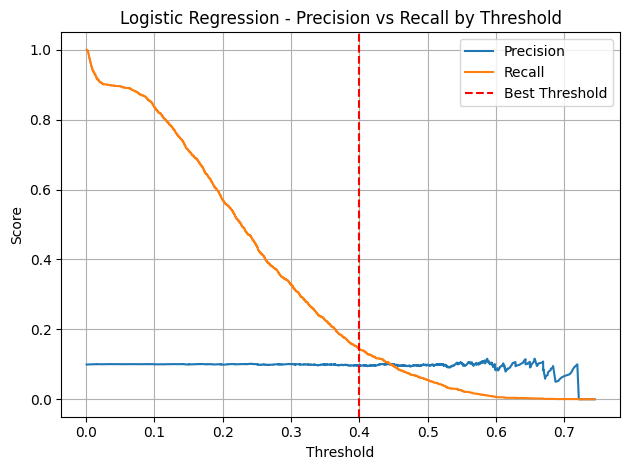


 Evaluating: XGBoost
5-Fold F1 Score: 0.7205 (+/- 0.0017)

Best Threshold for XGBoost: 0.48
Accuracy: 0.2852
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.23      0.37     17657
        True       0.10      0.80      0.18      1949

    accuracy                           0.29     19606
   macro avg       0.51      0.51      0.27     19606
weighted avg       0.83      0.29      0.35     19606



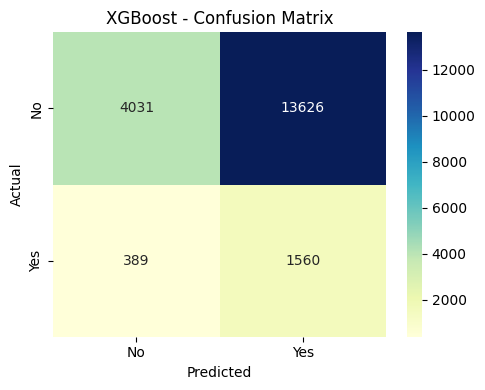

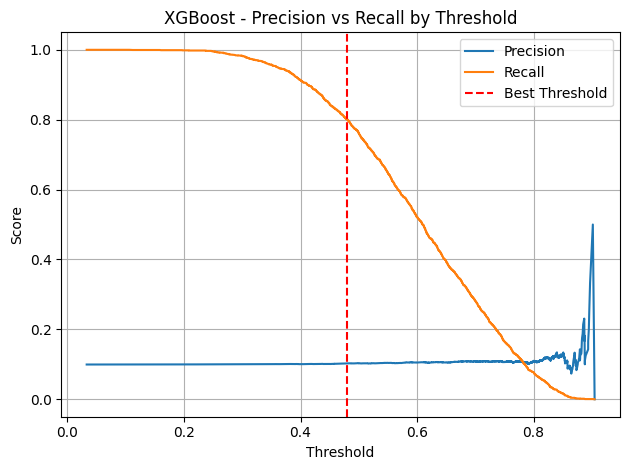


 Evaluating: Decision Tree
5-Fold F1 Score: 0.7458 (+/- 0.0017)

Best Threshold for Decision Tree: 0.40
Accuracy: 0.7142
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.77      0.83     17657
        True       0.11      0.25      0.15      1949

    accuracy                           0.71     19606
   macro avg       0.50      0.51      0.49     19606
weighted avg       0.82      0.71      0.76     19606



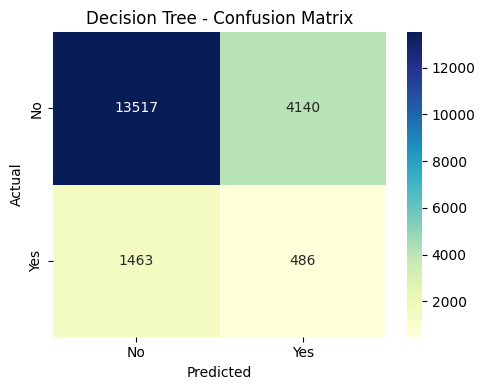

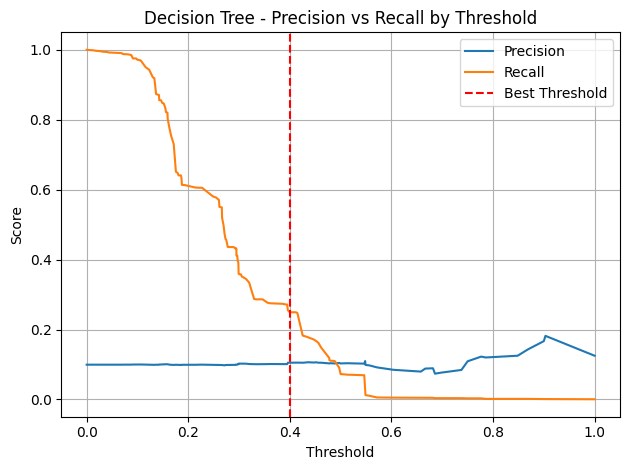


 Evaluating: Naive Bayes
5-Fold F1 Score: 0.7916 (+/- 0.0021)

Best Threshold for Naive Bayes: 0.40
Accuracy: 0.7393
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.80      0.85     17657
        True       0.10      0.20      0.13      1949

    accuracy                           0.74     19606
   macro avg       0.50      0.50      0.49     19606
weighted avg       0.82      0.74      0.78     19606



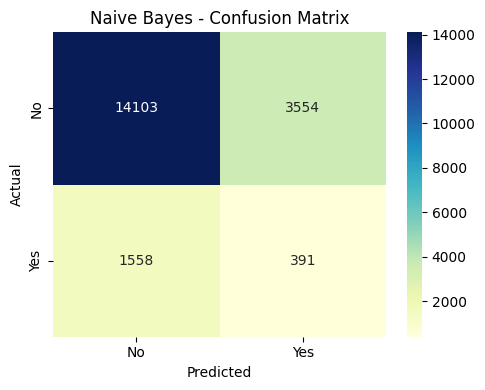

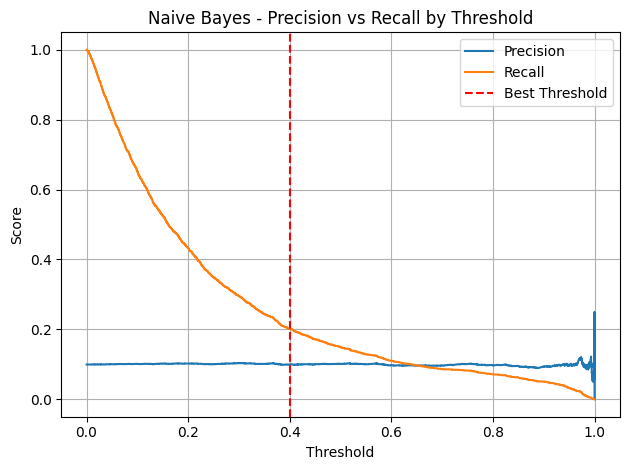

In [ ]:
# OVERSAMPLING USING SMOTE, USING 5 BASE MODELS FOR MODEL COMPARISON

# 2. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 3. Define 5 base models (efficient ones only)
base_models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=12, min_samples_leaf=2,
        class_weight="balanced", random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=1000, C=1.0, class_weight="balanced",
        solver='liblinear', random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.05,
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        subsample=0.8, colsample_bytree=0.8,
        eval_metric='logloss', random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10, class_weight="balanced", random_state=42
    ),
    "Naive Bayes": GaussianNB()
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_thresholds = {}

# 4. Cross-validation and threshold tuning
for name, model in base_models.items():
    print(f"\n Evaluating: {name}")

    # Cross-validation
    scores = cross_val_score(clone(model), X_resampled, y_resampled, cv=cv, scoring='f1')
    print(f"5-Fold F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")

    # Fit on resampled data
    model.fit(X_resampled, y_resampled)

    # Predict probabilities (if available)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # scale to [0, 1]

    # Threshold tuning
    best_thresh = 0.5
    best_f1 = 0
    for t in np.arange(0.4, 0.7, 0.02):
        y_thresh = (y_proba >= t).astype(int)
        f1 = f1_score(y_test, y_thresh)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

    best_thresholds[name] = best_thresh
    y_final = (y_proba >= best_thresh).astype(int)

    print(f"\nBest Threshold for {name}: {best_thresh:.2f}")
    print(f"Accuracy: {accuracy_score(y_test, y_final):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_final)}")

    # Confusion matrix heatmap
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_final)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} - Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Precision-recall vs threshold
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    plt.plot(thresholds, precision[:-1], label='Precision')
    plt.plot(thresholds, recall[:-1], label='Recall')
    plt.axvline(best_thresh, color='red', linestyle='--', label='Best Threshold')
    plt.title(f'{name} - Precision vs Recall by Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# **V. Model Ensembling**


=== Voting Classifier Evaluation ===
Threshold: 0.4
Accuracy: 0.5606
F1-score: 0.1701

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.57      0.70     17657
        True       0.10      0.45      0.17      1949

    accuracy                           0.56     19606
   macro avg       0.50      0.51      0.44     19606
weighted avg       0.83      0.56      0.65     19606



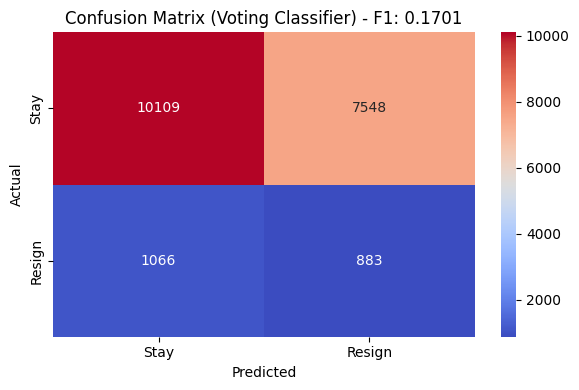

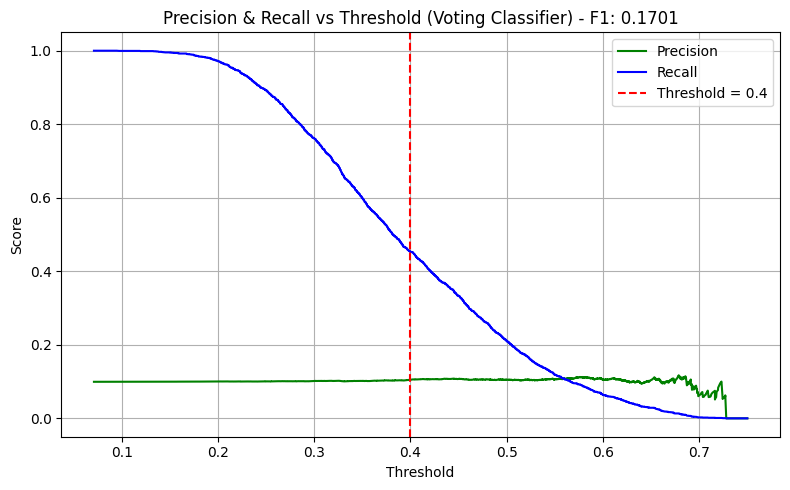

In [ ]:
# MODEL ENSEMBLING USING VOTING CLASSIFIER

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', base_models["Random Forest"]),
                ('lr', base_models["Logistic Regression"]),
                ('xgb', base_models["XGBoost"])],
    voting='soft'
)

voting_clf.fit(X_resampled, y_resampled)

# Predict probabilities and apply threshold
y_proba = voting_clf.predict_proba(X_test)[:, 1]
best_thresh_voting = 0.4
y_final = (y_proba >= best_thresh_voting).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_final)

# Text Output
print(f"\n=== Voting Classifier Evaluation ===")
print(f"Threshold: {best_thresh_voting}")
print(f"Accuracy: {accuracy_score(y_test, y_final):.4f}")
print(f"F1-score: {f1:.4f}\n")  # F1-score
print("Classification Report:")
print(classification_report(y_test, y_final))

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_final)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Stay', 'Resign'], yticklabels=['Stay', 'Resign'])
plt.title(f'Confusion Matrix (Voting Classifier) - F1: {f1:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.axvline(best_thresh_voting, color='red', linestyle='--', label=f'Threshold = {best_thresh_voting}')
plt.title(f'Precision & Recall vs Threshold (Voting Classifier) - F1: {f1:.4f}')  # Adding F1-score to the title
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

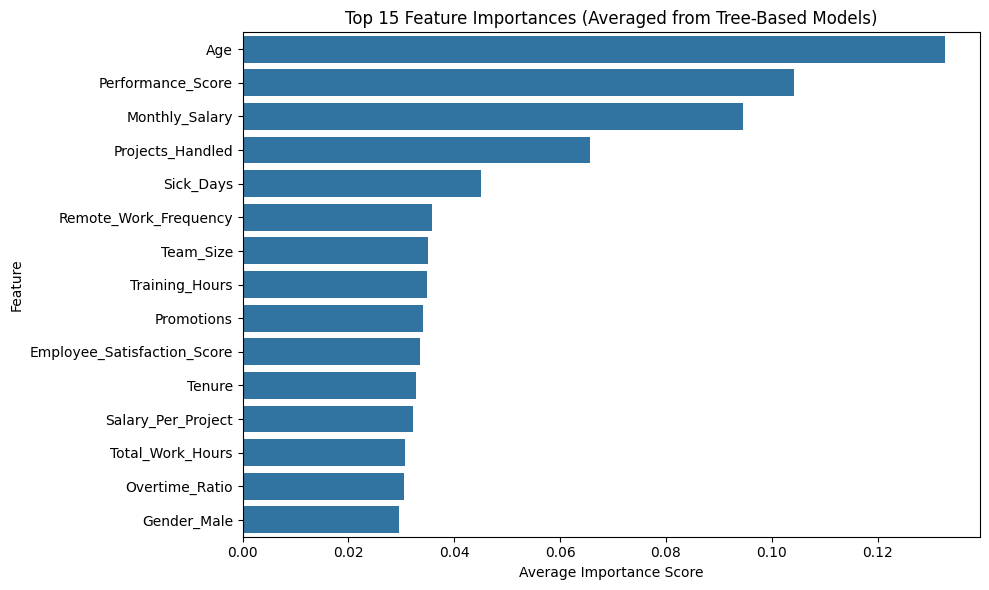


📄 Combined Feature Importances (Top 15):
Age                            0.132717
Performance_Score              0.104238
Monthly_Salary                 0.094577
Projects_Handled               0.065721
Sick_Days                      0.044960
Remote_Work_Frequency          0.035791
Team_Size                      0.034980
Training_Hours                 0.034864
Promotions                     0.034156
Employee_Satisfaction_Score    0.033556
Tenure                         0.032853
Salary_Per_Project             0.032231
Total_Work_Hours               0.030775
Overtime_Ratio                 0.030576
Gender_Male                    0.029538
dtype: float64


In [ ]:
# FEATURE IMPORTANCES FROM EACH MODEL IN CLASSIFIER
feature_importances = {}

for name, model in voting_clf.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

# Combine feature importances into a single DataFrame for comparison
importances_df = pd.DataFrame(feature_importances)
importances_df.columns = [f'{model} Importance' for model in importances_df.columns]

# Average the importances across models
combined_importances = importances_df.mean(axis=1).sort_values(ascending=False)

# Link back to feature names (based on column order in X_resampled)
feature_names = X_resampled.columns
feature_importance_series = pd.Series(combined_importances.values, index=feature_names)
feature_importance_series = feature_importance_series.sort_values(ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance_series.values[:15],
    y=feature_importance_series.index[:15],
)
plt.title("Top 15 Feature Importances (Averaged from Tree-Based Models)")
plt.xlabel("Average Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Optional: Display the raw importances for reference
print("\n📄 Combined Feature Importances (Top 15):")
print(feature_importance_series.head(15))




# **VI. Model Saving and Deployment**

In [ ]:
# Construct the file path
file_path = '/content/drive/My Drive/BOOC_Dataset/voting_clf_model.pkl'

# Save the model
with open(file_path, 'wb') as file:
    pickle.dump(voting_clf, file)